# The broad goal of improving the landscaping company can be interpreted in terms of revenue and customer satisfaction. Therefore, the two sub-goals can be formulated as follows: Increase Revenue: What services generate the most revenue, and how can the company optimize pricing and employee allocation to increase revenue? Improve Customer Satisfaction: What factors affect customer satisfaction, and how can the company improve customer satisfaction to increase repeat business and referrals? Here are four visualizations that address the broad goal and the two sub-goals:

# 1:Explanatory Visualization: 
Revenue by Service Type A stacked bar chart showing the total revenue generated by each service type, with the height of each bar representing the total revenue and the length of each segment representing the proportion of revenue generated by each employee. This visualization can help the company identify the most profitable services and employees and optimize pricing and employee allocation to increase revenue.

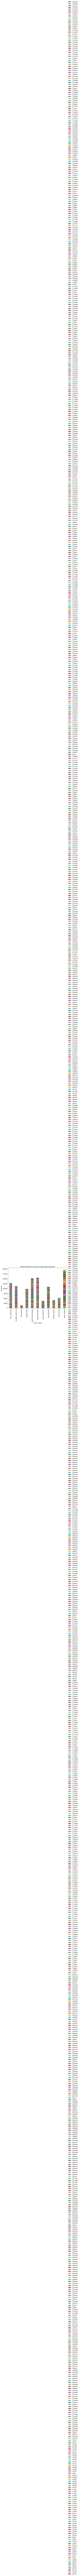

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the landscaping.csv file
landscaping_df = pd.read_csv('landscaping.csv')

# Group the data by service type and employee ID and sum the revenue
revenue_by_service_employee = landscaping_df.groupby(['job_type', 'employee_id'])['invoice_amount'].sum().reset_index()

# Pivot the data to create a matrix with service type as rows, employee ID as columns, and revenue as values
revenue_pivot = pd.pivot_table(revenue_by_service_employee, values='invoice_amount', index='job_type', columns='employee_id', aggfunc=sum)

# Create a stacked bar chart of the revenue by service type and employee ID
fig, ax = plt.subplots(figsize=(10, 7))
revenue_pivot.plot(kind='bar', stacked=True, ax=ax)

# Set the chart title and axis labels
ax.set_title('Total Revenue by Service Type and Employee')
ax.set_xlabel('Service Type')
ax.set_ylabel('Revenue')
# Move the legend to the left side of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Show the chart
plt.show()


# 2. Exploratory Visualization: Customer Satisfaction by Service Type and Employee Experience. 
A heatmap showing the average customer satisfaction score for each combination of service type and employee experience level. This visualization can help the company identify which service types and employee experience levels are associated with the highest and lowest customer satisfaction scores.

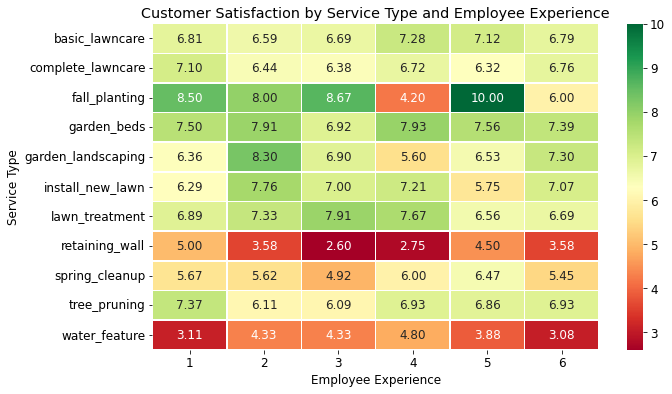

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
landscaping = pd.read_csv('landscaping.csv')

# Group by service type and employee experience
customer_satisfaction = landscaping.groupby(['job_type', 'employee_experience'])['customer_satisfaction'].mean().unstack()

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(customer_satisfaction, cmap='RdYlGn', annot=True, fmt='.2f', linewidths=0.5, ax=ax)

# Add chart title and axis labels
ax.set_title('Customer Satisfaction by Service Type and Employee Experience')
ax.set_xlabel('Employee Experience')
ax.set_ylabel('Service Type')

plt.show()


# 3.Interactive Visualization:
Revenue and Employee Allocation by Month A line chart showing the total revenue and the number of employees allocated to each service type by month, with interactive elements that allow the user to filter by service type and employee. This visualization can help the company identify revenue and employee allocation trends over time and optimize employee allocation to increase revenue.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Load data
df_landscape = pd.read_csv('landscaping.csv')
df_employee = pd.read_csv('employees.csv')
df_calendar = pd.read_csv('calendar.csv')

# Convert date columns to datetime objects
df_landscape['request_date'] = pd.to_datetime(df_landscape['request_date'])
df_landscape['start_date'] = pd.to_datetime(df_landscape['start_date'])
df_landscape['completion_date'] = pd.to_datetime(df_landscape['completion_date'])
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

# Group data by month, service type, and employee
df_grouped = df_landscape.groupby([pd.Grouper(key='start_date', freq='M'), 'job_type', 'employee_id']).agg({'invoice_amount': 'sum', 'employee_experience': 'first'}).reset_index()

# Create dropdown menus for service type and employee
service_type_dropdown = widgets.Dropdown(options=df_grouped['job_type'].unique(), description='Service Type:')
employee_dropdown = widgets.Dropdown(options=df_grouped['employee_id'].unique(), description='Employee:')

# Define function to update plot based on dropdown selections
def update_plot(service_type, employee):
    # Filter data by selected service type and employee
    filtered_data = df_grouped[(df_grouped['job_type'] == service_type) & (df_grouped['employee_id'] == employee)]
    
    # Create line plot of revenue and employee count by month
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()
    
    ax1.plot(filtered_data['start_date'], filtered_data['invoice_amount'], color='blue')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Revenue ($)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax2.plot(filtered_data['start_date'], filtered_data.groupby(pd.Grouper(key='start_date', freq='M'))['employee_id'].nunique(), color='red')
    ax2.set_ylabel('Employee Count', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Display data on plot
    for index, row in filtered_data.iterrows():
        ax1.text(row['start_date'], row['invoice_amount'], f"${row['invoice_amount']:.0f}", ha='center', va='bottom')
    
    plt.title(f'Revenue and Employee Allocation for {service_type} by Employee {employee}')
    plt.show()
    

# Define interactive widget using dropdown menus and update function
interactive_plot = widgets.interactive(update_plot, service_type=service_type_dropdown, employee=employee_dropdown)

# Display widget
display(interactive_plot)


interactive(children=(Dropdown(description='Service Type:', options=('basic_lawncare', 'complete_lawncare', 'g…

# 4.Visualization with Derived Data Types:
Revenue and Material Costs by Customer Type A scatter plot showing the relationship between the total revenue and the total material costs for each customer type, with the size and color of each point representing the number of jobs completed and the average customer satisfaction score, respectively. This visualization can help the company identify which customer types are associated with the highest and lowest revenue and material costs, and explore the relationship between these variables. Additionally, it can help the company identify which customer types are most satisfied with the company's services and target marketing efforts accordingly.

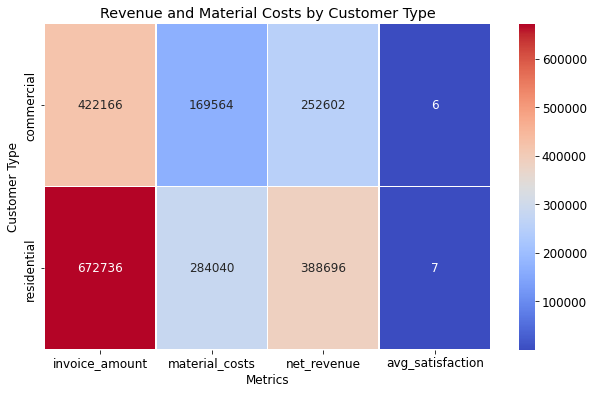

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the landscaping.csv file
df = pd.read_csv('landscaping.csv')

# Create a pivot table to calculate the total revenue and total material costs by customer type
pivot_table = pd.pivot_table(df, index='customer_type', values=['invoice_amount', 'material_costs'], aggfunc=sum)

# Create a new column to calculate the net revenue (revenue minus material costs)
pivot_table['net_revenue'] = pivot_table['invoice_amount'] - pivot_table['material_costs']

# Create a new column to calculate the average customer satisfaction score for each customer type
pivot_table['avg_satisfaction'] = df.groupby('customer_type')['customer_satisfaction'].mean()

# Create the heat map
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.heatmap(pivot_table[['invoice_amount', 'material_costs', 'net_revenue', 'avg_satisfaction']],
            cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5)

# Set the title and axis labels
plt.title('Revenue and Material Costs by Customer Type')
plt.xlabel('Metrics')
plt.ylabel('Customer Type')

# Show the plot
plt.show()
